In [21]:
#add code from Task1.ipynb

In [1]:
#import the required libraries and packages
# !pip install tensorflow matplotlib
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#load the dataset


extracted_folder = 'C:\\Users\\Priyam\\Documents\\Temp\\Flight\\DeepSeaROV\\Deepdive'  





# Defining the different paths
train_dir = os.path.join(extracted_folder, 'train')
test_dir = os.path.join(extracted_folder, 'test')
validation_dir = os.path.join(extracted_folder, 'validation')

print(f"Train Directory: {train_dir}")
print(f"Test Directory: {test_dir}")
print(f"Validation Directory: {validation_dir}")


# Load the dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Train Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\train
Test Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\test
Validation Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\validation
Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.


In [19]:
# preprocess the data

Train Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\train
Test Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\test
Validation Directory: C:\Users\Priyam\Documents\Temp\Flight\DeepSeaROV\Deepdive\validation
Found 2667 images belonging to 33 classes.
Found 667 images belonging to 33 classes.
Found 660 images belonging to 33 classes.


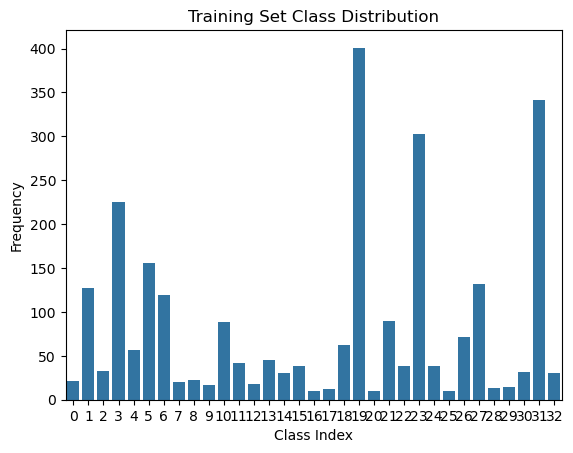

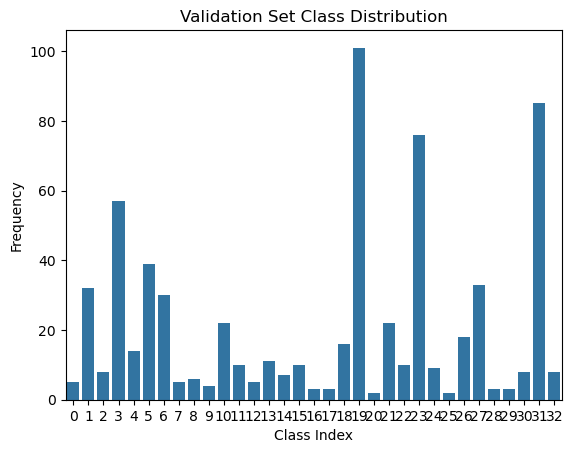

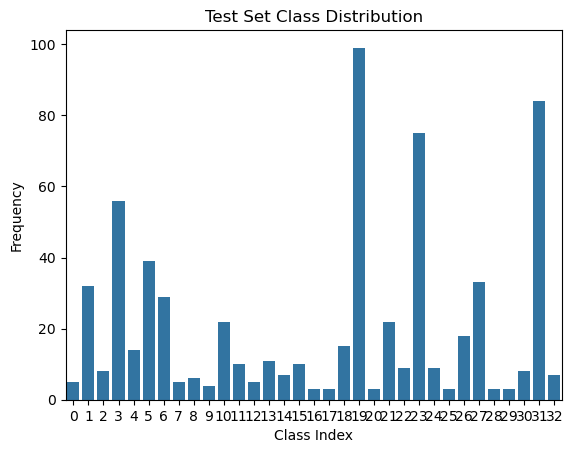

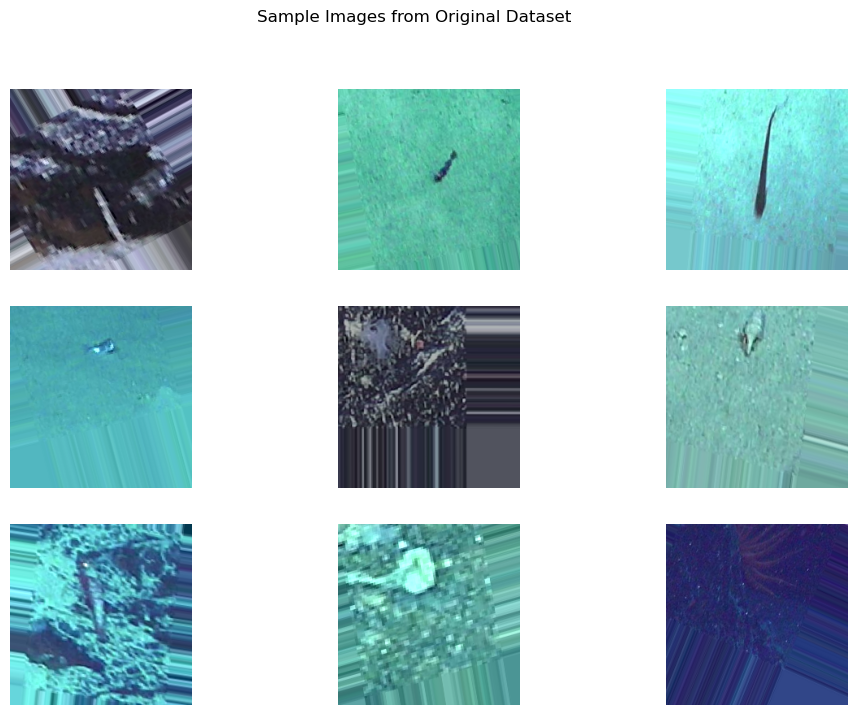

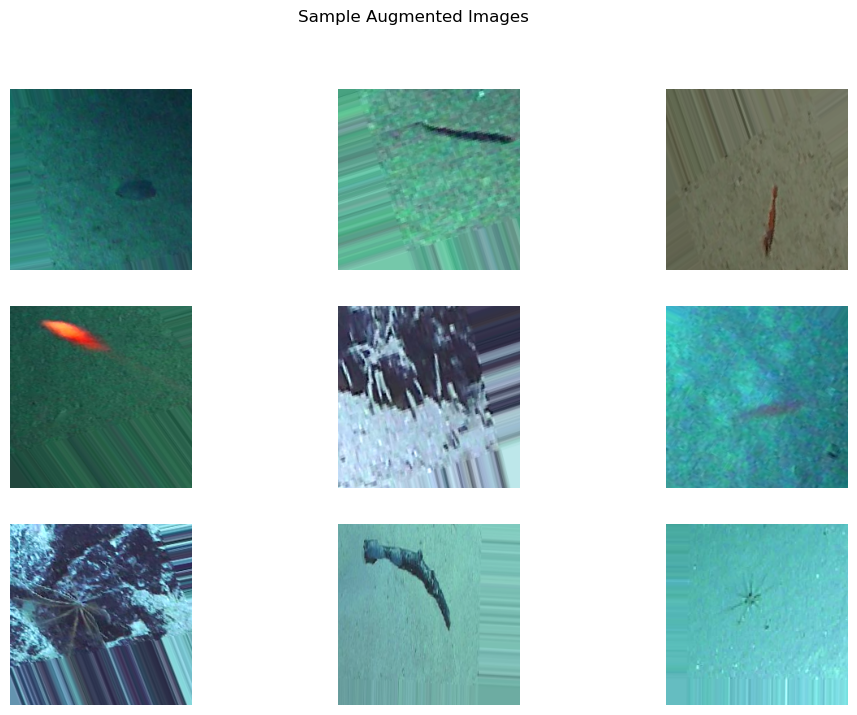

Total Valid Images: 2667
Total Valid Images: 667
Total Valid Images: 660


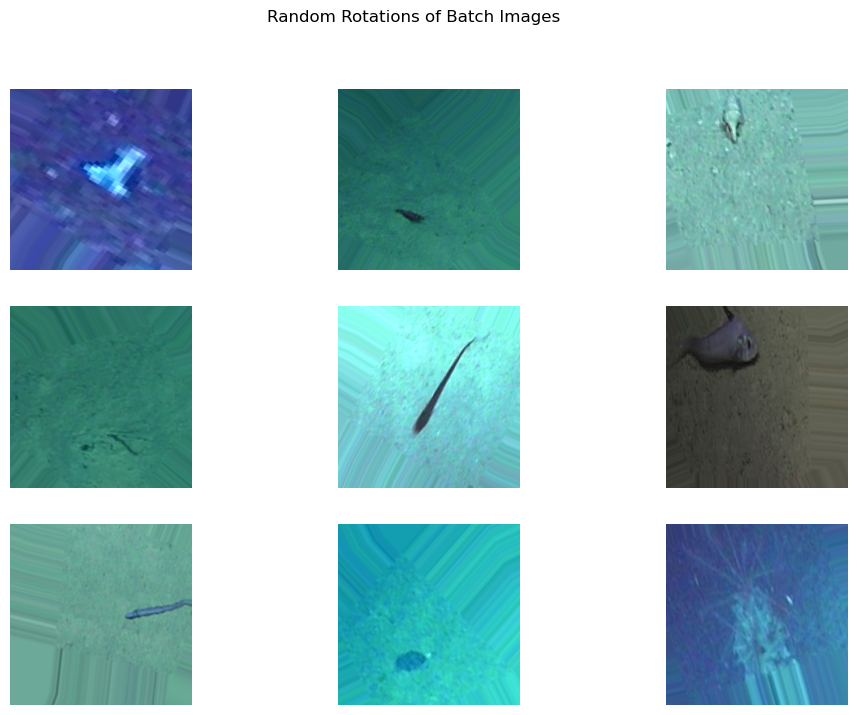

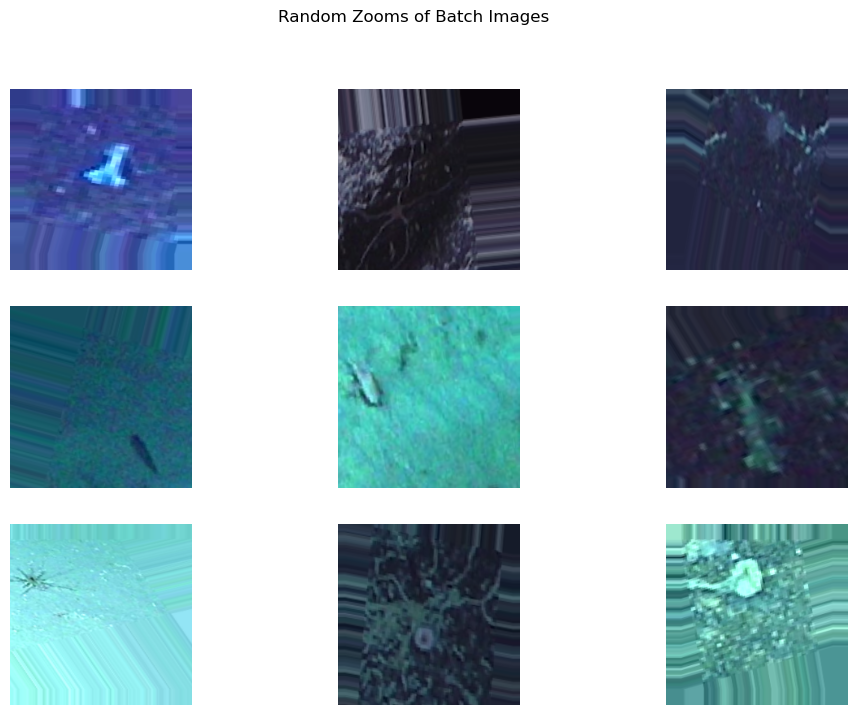

In [17]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Directories
extracted_folder = 'C:\\Users\\Priyam\\Documents\\Temp\\Flight\\DeepSeaROV\\Deepdive'
train_dir = os.path.join(extracted_folder, 'train')
test_dir = os.path.join(extracted_folder, 'test')
validation_dir = os.path.join(extracted_folder, 'validation')

print(f"Train Directory: {train_dir}")
print(f"Test Directory: {test_dir}")
print(f"Validation Directory: {validation_dir}")

# Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the images
    rotation_range=30,  # Random rotation
    width_shift_range=0.3,  # Random width shift
    height_shift_range=0.3,  # Random height shift
    shear_range=0.3,  # Random shear
    zoom_range=0.3,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest',  # Fill mode for new pixels
    brightness_range=[0.5, 1.5]  # Adjust brightness
)

test_datagen = ImageDataGenerator(
    rescale=1./255,  # Only rescaling for test set
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

# Loading Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Check class distribution
def plot_class_distribution(generator, title):
    sns.countplot(x=generator.classes)
    plt.title(title)
    plt.xlabel('Class Index')
    plt.ylabel('Frequency')
    plt.show()

plot_class_distribution(train_generator, "Training Set Class Distribution")
plot_class_distribution(validation_generator, "Validation Set Class Distribution")
plot_class_distribution(test_generator, "Test Set Class Distribution")

# Inspecting Data Samples: Before augmentation
x_batch, y_batch = next(train_generator)  # Get a batch of data
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Sample Images from Original Dataset")
plt.show()

# Inspecting Data Samples: After augmentation
augmented_batch, _ = next(train_generator)  # Get augmented data
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_batch[i])
    plt.axis('off')
plt.suptitle("Sample Augmented Images")
plt.show()

# Handle any potential corrupted images (optional example code)
def verify_images(directory):
    valid_images = 0
    corrupted_images = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            try:
                img = plt.imread(os.path.join(subdir, file))
                valid_images += 1
            except Exception as e:
                corrupted_images.append(file)
                print(f"Corrupted file: {file}, Error: {e}")
    print(f"Total Valid Images: {valid_images}")
    if corrupted_images:
        print(f"Corrupted Files: {corrupted_images}")

verify_images(train_dir)
verify_images(validation_dir)
verify_images(test_dir)

# Additional Image Preprocessing Functions

# Function to visualize random rotations from the dataset
def visualize_random_rotation(batch_images):
    datagen = ImageDataGenerator(rotation_range=40)
    augmented_images = datagen.flow(batch_images, batch_size=9)
    aug_img_batch = next(augmented_images)  # Get augmented batch using next()
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(aug_img_batch[i])
        plt.axis('off')
    plt.suptitle("Random Rotations of Batch Images")
    plt.show()

# Visualize random rotations for a batch from the training data
visualize_random_rotation(x_batch)

# Function to visualize random zoom from the dataset
def visualize_random_zoom(batch_images):
    datagen = ImageDataGenerator(zoom_range=0.3)
    augmented_images = datagen.flow(batch_images, batch_size=9)
    aug_img_batch = next(augmented_images)  # Get augmented batch using next()
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(aug_img_batch[i])
        plt.axis('off')
    plt.suptitle("Random Zooms of Batch Images")
    plt.show()

# Visualize random zoom for a batch from the training data
visualize_random_zoom(x_batch)
